In [5]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter For Data Scientist Data
#df_DS= df[df["job_title_short"]=="Data Scientist"].copy()

In [6]:
#Only gets Data Scientist jobs from Selected Country
df_DS_US=df[(df["job_title_short"]=="Data Scientist")&   (df['job_country']=="United States")].copy()

In [7]:
#Drop NaN values from the column for Plotting
df_DS_US=df_DS_US.dropna(subset=['salary_year_avg'])
df_DS_US["salary_year_avg"].sample(10)

336327    112000.0
705374    133500.0
447489    100000.0
488745    125000.0
525478     99500.0
515908     90000.0
204729    100000.0
398064    145000.0
150049    125000.0
743770    142225.0
Name: salary_year_avg, dtype: float64

<Axes: >

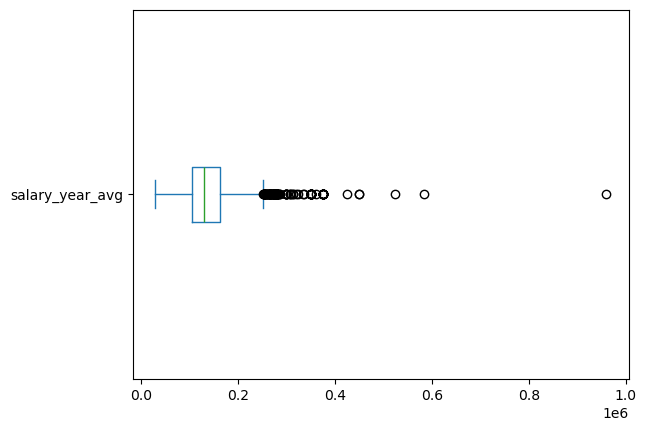

In [8]:
df_DS_US["salary_year_avg"].plot(kind='box',vert=False)


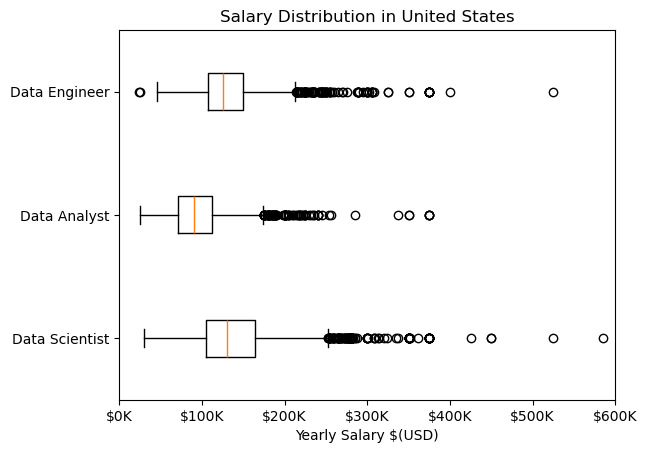

In [9]:
job_titles= ['Data Scientist','Data Analyst','Data Engineer']

df_US=df[(df["job_title_short"].isin(job_titles)) &  (df['job_country']=="United States")].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])
job_list= [df_US[df_US['job_title_short']==job_title]['salary_year_avg']for job_title in job_titles]

plt.boxplot(job_list,  labels=job_titles , vert=False)
plt.title("Salary Distribution in United States")
plt.xlabel("Yearly Salary $(USD)")
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()